In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv(r"C:\Users\comp\Downloads\train.csv") 

# Display basic information
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [2]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    DATA VISUALIZATION

PIE CHART :  Distribution of Toxic vs Non-Toxic Comments

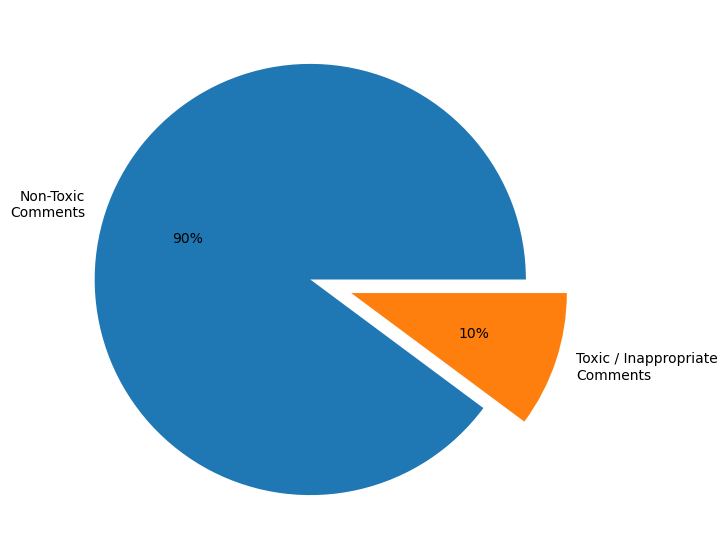

In [4]:
non_toxic = df.query('toxic==0 & severe_toxic==0 & obscene==0 & threat==0 & insult==0 & identity_hate==0')
# non toxic comments out of total dataset
labels = ['Non-Toxic\nComments', 'Toxic / Inappropriate\nComments']
fig = plt.figure(figsize = (7, 7))
explode = [0.0, 0.2]
plt.pie([non_toxic.shape[0], df.shape[0] - non_toxic.shape[0]], autopct='%1.0f%%', labels=labels, explode=explode)
plt.show()


The chart shows that 90% of the comments in the dataset are non-toxic (shown in blue).

Only 10% of the comments are labeled as toxic or inappropriate (highlighted in orange).

The dataset is highly imbalanced, with non-toxic comments making up the vast majority.

Techniques like SMOTE (Synthetic Minority Oversampling Technique) or penalizing misclassification of toxic comments could be considered during training to address the imbalance.




HISTOGRAM: Distribution of Comment Lengths

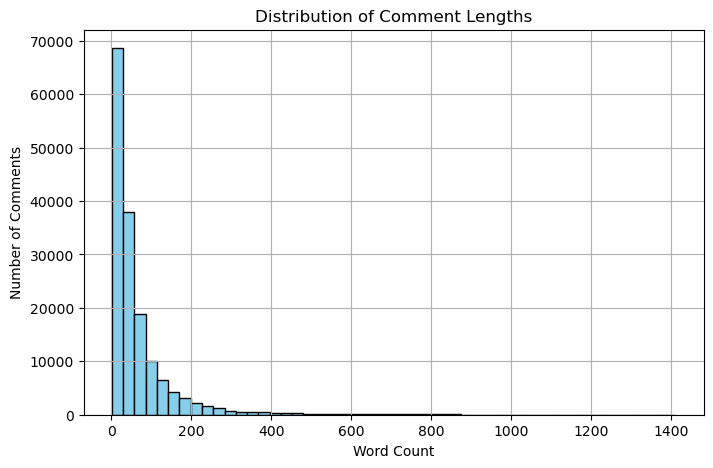

In [5]:
df["comment_length"] = df["comment_text"].apply(lambda x: len(str(x).split()))  # Count words

plt.figure(figsize=(8,5))
df["comment_length"].hist(bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Comment Lengths")
plt.xlabel("Word Count")
plt.ylabel("Number of Comments")
plt.show()

Majority of comments are short:

Most comments have between 0 to 100 words, with a strong peak around 10–30 words.

The number of comments decreases sharply as word count increases.

The model can process data faster due to the short average comment length.

BAR CHART : Distribution of Toxic Comments

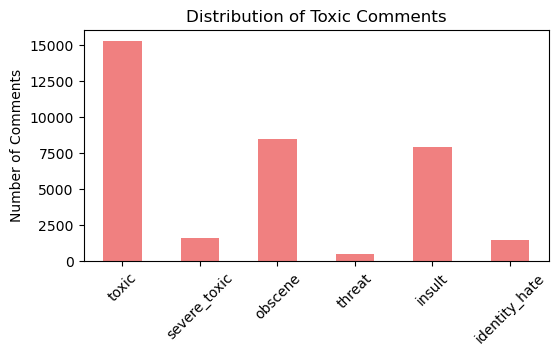

In [8]:
import matplotlib.pyplot as plt

# Count the number of toxic and non-toxic comments
toxic_counts = df.iloc[:, 2:-1].sum()  # Sum up all toxicity labels
toxic_counts.plot(kind="bar", color="lightcoral", figsize=(6,3))

plt.title("Distribution of Toxic Comments")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()

We have decided to merge all the class under toxic_label class so distribution isn't gonna create any problem

WORD CLOUD :Most Common Words in Non-Toxic Comments

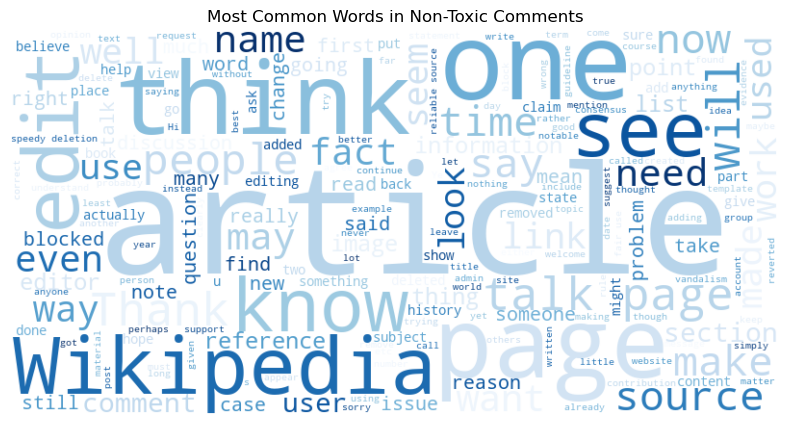

In [10]:
# Filter only non-toxic comments
non_toxic_comments = df[df["toxic"] == 0]["comment_text"]
non_toxic_text = " ".join(non_toxic_comments.dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(non_toxic_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Non-Toxic Comments")
plt.show()


Interpretation:
"article," "Wikipedia," "page," "edit," "source" are the most dominant terms.
These show that non-toxic users often express opinions, ask questions, or explain things respectfully.


CORRELATION HEATMAP: Correlation Between Toxicity Labels

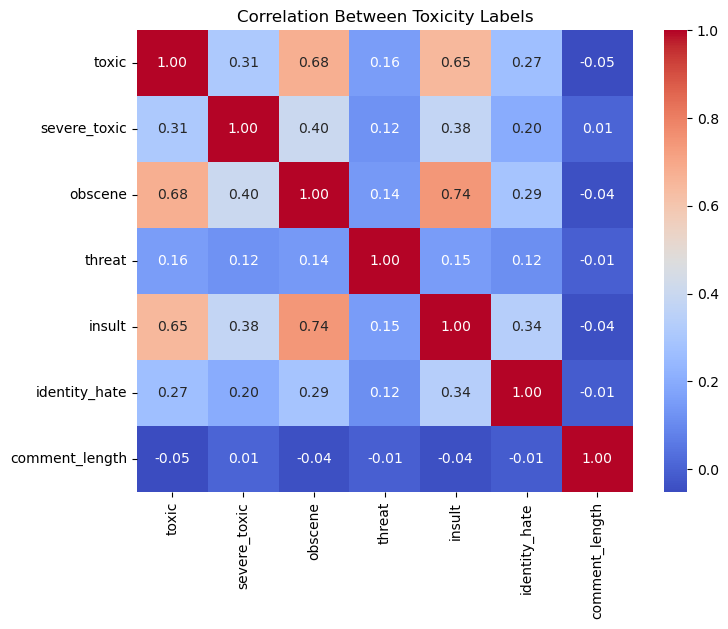

In [11]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.iloc[:, 2:].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Between Toxicity Labels")
plt.show()


Interpretation:
Correlation between labels does not matter as we are not using multi-label classification

Comment length is not a strong indicator of toxicity — quality of content matters more than length.